First import the csv data from previous step: Immo-eliza- Data-Scraper, we could import the data by copy past in the new project or collect the url from previous project to stay up to date white the date

In [62]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#We want to us previous data (so link) from scraper, so if that updates, this will to.
root_url = "https://raw.githubusercontent.com/CarolineVHK/immo-eliza-scraping-Python_Pricers/main/data/all_property_details.csv"
data = pd.read_csv(root_url)
print("This is an example of the raw data we would handle.")
data.head()

This is an example of the raw data we would handle.


,ID,Street,HouseNumber,Box,Floor,City,PostalCode,Region,District,Province,...,Garden,GardenArea,Facades,SwimmingPool,Condition,EPCScore,Latitude,Longitude,PropertyUrl,Property url
0,11132404,Rue de Sart,76,NaN,NaN,COURT-SAINT-ETIENNE,1490,WALLONIE,Nivelles,Walloon Brabant,...,1.0,1333.0,4.0,NaN,JUST_RENOVATED,D,50.624459,4.562738,NaN,https://www.immoweb.be/en/classified/house/for...
1,10820901,Rue de Trisogne,15,D,NaN,Ciney,5590,WALLONIE,Dinant,Namur,...,NaN,736.0,3.0,NaN,AS_NEW,A,50.281860,5.167839,NaN,https://www.immoweb.be/en/classified/villa/for...
2,11080049,Chauss�e de Mons,747,NaN,NaN,Anderlecht,1070,BRUSSELS,Brussels,Brussels,...,NaN,91.0,2.0,0.0,TO_BE_DONE_UP,F,50.829926,4.307101,NaN,https://www.immoweb.be/en/classified/house/for...
3,11137923,Braambezielaan,10,NaN,NaN,Gent Wondelgem,9032,FLANDERS,Gent,East Flanders,...,1.0,261.0,2.0,0.0,AS_NEW,D,51.080022,3.702782,NaN,https://www.immoweb.be/en/classified/house/for...
4,11139236,Lindanusstraat,39,NaN,NaN,Dendermonde,9200,FLANDERS,Dendermonde,East Flanders,...,1.0,215.0,2.0,NaN,TO_BE_DONE_UP,E,51.028484,4.103270,NaN,https://www.immoweb.be/en/classified/mansion/f...


Now that we have the raw data we want to see which data is missing, which data we want to use and how we want to use it. 

In [63]:
#overview columns with missing data
data.isna().sum()

ID                      0
Street               2659
HouseNumber          2906
Box                 14462
Floor                9782
City                    0
PostalCode              0
Region                  0
District                0
Province                0
PropertyType            0
PropertySubType         0
Price                   0
SaleType                0
ConstructionYear     4326
BedroomCount            0
LivingArea            518
KitchenType          5231
Furnished           10991
Fireplace               0
Terrace              6363
TerraceArea         10076
Garden              13458
GardenArea           8827
Facades              4642
SwimmingPool        10683
Condition            3814
EPCScore             2218
Latitude             2662
Longitude            2662
PropertyUrl         18598
Property url            0
dtype: int64

Checking for duplicates

In [64]:
#Find duplicates:
duplicates = data[data.duplicated()]
    #print("Those are the duplicates : \n", duplicates['ID'])
    #print("There are, ", (duplicates.count()), "duplicates.")
#Remove duplicates:
data_remove_dup = data.drop_duplicates(duplicates)
print(data_remove_dup)

             ID                   Street HouseNumber  Box  Floor  \
0      11132404              Rue de Sart          76  NaN    NaN   
1      10820901          Rue de Trisogne          15    D    NaN   
2      11080049         Chauss�e de Mons         747  NaN    NaN   
3      11137923           Braambezielaan          10  NaN    NaN   
4      11139236           Lindanusstraat          39  NaN    NaN   
...         ...                      ...         ...  ...    ...   
18591  11016443            Waterhoenlaan          14    1    1.0   
18592  10888214  Jaak Van Buggenhoutlaan         20A  NaN    2.0   
18593  11018701            Avenue d'Aout          14  NaN    1.0   
18594  11038008   Rue Marcel Thiry 4/203         NaN    0    3.0   
18595  11016442            Waterhoenlaan          14    1    1.0   

                       City  PostalCode    Region     District  \
0       COURT-SAINT-ETIENNE        1490  WALLONIE     Nivelles   
1                     Ciney        5590  WALLONIE  

In [65]:
#check duplicates gone
duplicates_check = data_remove_dup[data_remove_dup.duplicated()]
print(duplicates_check)

Empty DataFrame
Columns: [ID, Street, HouseNumber, Box, Floor, City, PostalCode, Region, District, Province, PropertyType, PropertySubType, Price, SaleType, ConstructionYear, BedroomCount, LivingArea, KitchenType, Furnished, Fireplace, Terrace, TerraceArea, Garden, GardenArea, Facades, SwimmingPool, Condition, EPCScore, Latitude, Longitude, PropertyUrl, Property url]
Index: []

[0 rows x 32 columns]


cleaning data é, â,  is changed into ?
1. do it like a function in the previous step while scraping and befor putting it into the dictionary
--> DONOT change afterwards, a broken file can't be fixed without source data


In [66]:
# data = None
# #list of encoding types:
# encodings = ['utf-8', 'latin1', 'iso-8859-1']
# #read file trought encoding
# for encoding in encodings:
#     try:
#         data = pd.read_csv(root_url, encoding=encoding)
#         print("Successfully read using encoding:", encoding)
#         break
#     except Exception as e:
#         print("Error reading with encoding {}: {}".format(encoding, e))
# if data is not None:
#     data_clean_special_characters = 'new_data.csv'
#     data.to_csv(data_clean_special_characters, index=False)
#     print("New CSV file '{}' created successfully.".format(data_clean_special_characters))

Checking wich data we have scraped and what I want to visualize:

In [67]:
print(" -- What columns do I have: -- ")
data.columns

 -- What columns do I have: -- 


Index(['ID', 'Street', 'HouseNumber', 'Box', 'Floor', 'City', 'PostalCode',
       'Region', 'District', 'Province', 'PropertyType', 'PropertySubType',
       'Price', 'SaleType', 'ConstructionYear', 'BedroomCount', 'LivingArea',
       'KitchenType', 'Furnished', 'Fireplace', 'Terrace', 'TerraceArea',
       'Garden', 'GardenArea', 'Facades', 'SwimmingPool', 'Condition',
       'EPCScore', 'Latitude', 'Longitude', 'PropertyUrl', 'Property url'],
      dtype='object')

In [68]:
print(" -- What's inside EPCScore: -- ")
data["EPCScore"].unique()

 -- What's inside EPCScore: -- 


array(['D', 'A', 'F', 'E', 'C', 'B', 'G', nan, 'A+', 'A++', 'A+_A++',
       'A_A+'], dtype=object)

In [69]:
print(" -- What's inside Region: -- ")
data["Region"].unique()

 -- What's inside Region: -- 


array(['WALLONIE', 'BRUSSELS', 'FLANDERS'], dtype=object)

In [70]:
print(" -- What's inside District: -- ")
data["District"].unique()

 -- What's inside District: -- 


array(['Nivelles', 'Dinant', 'Brussels', 'Gent', 'Dendermonde',
       'Mechelen', 'Li�ge', 'Leuven', 'Oudenaarde', 'Marche-en-Famenne',
       'Antwerp', 'Sint-Niklaas', 'Arlon', 'Neufch�teau', 'Waremme',
       'Verviers', 'Huy', 'Halle-Vilvoorde', 'Bastogne', 'Aalst',
       'Oostend', 'Soignies', 'Brugge', 'Tielt', 'Charleroi', 'Thuin',
       'Virton', 'Kortrijk', 'Mons', 'Turnhout', 'Tournai', 'Namur',
       'Roeselare', 'Mouscron', 'Maaseik', 'Ath', 'Tongeren', 'Eeklo',
       'Veurne', 'Hasselt', 'Philippeville', 'Ieper', 'Diksmuide'],
      dtype=object)

In [71]:
print(" -- What's inside PropertyType: -- ")
data["PropertyType"].unique()

 -- What's inside PropertyType: -- 


array(['HOUSE', 'APARTMENT'], dtype=object)

In [72]:
print(" -- What's inside PropertySubType: -- ")
data["PropertySubType"].unique()

 -- What's inside PropertySubType: -- 


array(['HOUSE', 'VILLA', 'MANSION', 'APARTMENT_BLOCK',
       'MIXED_USE_BUILDING', 'EXCEPTIONAL_PROPERTY', 'TOWN_HOUSE',
       'MANOR_HOUSE', 'BUNGALOW', 'COUNTRY_COTTAGE', 'FARMHOUSE',
       'CASTLE', 'OTHER_PROPERTY', 'CHALET', 'APARTMENT', 'PENTHOUSE',
       'DUPLEX', 'FLAT_STUDIO', 'SERVICE_FLAT', 'TRIPLEX', 'KOT',
       'GROUND_FLOOR', 'LOFT'], dtype=object)

In [73]:
print(" -- What's inside Facades: -- ")
data["Facades"].unique()

 -- What's inside Facades: -- 


array([ 4.,  3.,  2., nan,  1.,  8.,  6.,  5.])

In [74]:
print(" -- What's inside Condition: -- ")
data["Condition"].unique()

 -- What's inside Condition: -- 


array(['JUST_RENOVATED', 'AS_NEW', 'TO_BE_DONE_UP', 'GOOD', 'TO_RENOVATE',
       nan, 'TO_RESTORE'], dtype=object)

In [75]:
#Modules needed:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#source used:
data = pd.read_csv('../src/cleaned/cleaned_data.csv')

FileNotFoundError: [Errno 2] No such file or directory: '../src/cleaned/cleaned_data.csv'

Start with relationships from data:
1. Price vs Condition

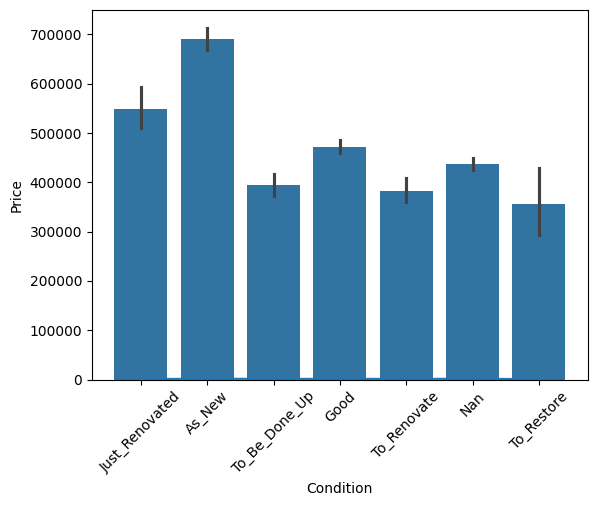

In [ ]:

sns.barplot(data=data, x="Condition",y="Price")
plt.xticks(rotation=45)
sns.lineplot(data=data, x="Condition", y="ConstructionYear")
plt.ticklabel_format(style='plain', axis= 'y')
plt.show()

1.b Price per Condition vs relation with ConstructionYear

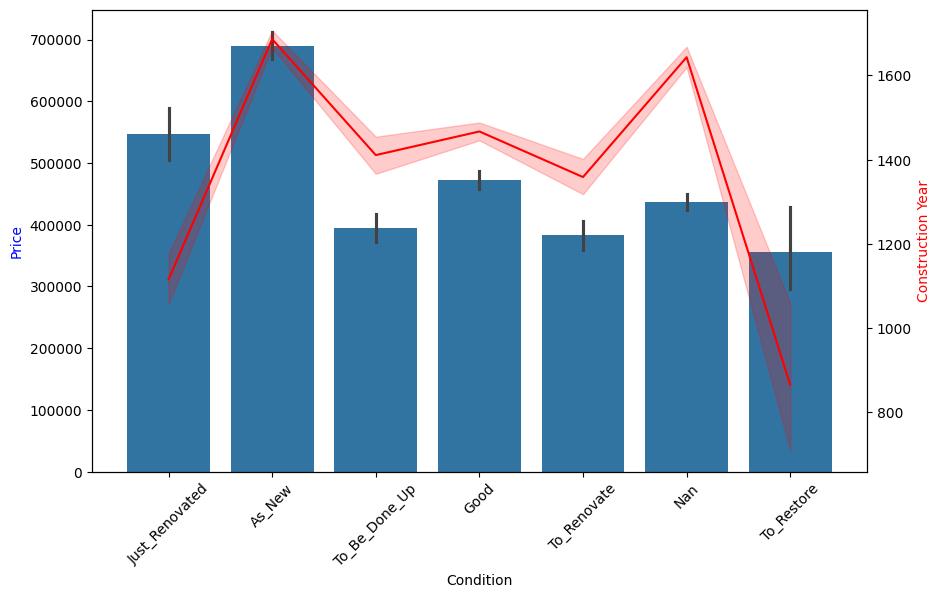

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(data=data, x="Condition", y="Price", ax=ax)
ax.set_ylabel("Price", color='b')
plt.xticks(rotation=45)

ax2 = ax.twinx()
sns.lineplot(data=data, x="Condition", y="ConstructionYear", color='red', ax=ax2)
ax2.set_ylabel("Construction Year", color="r")

ax2.ticklabel_format(style='plain', axis='y')

plt.show()

2. Price per Region

In [ ]:

average_price = data.groupby('Region','Province')['Price'].mean().reset_index()
print(average_price)
#sns.barplot(data=average_price, x="Region", y="Price", color="green")

#customize plt
# plt.xlabel('Region')
# plt.ylabel('Average Price')
# plt.title('Average Price per Region')
# plt.show()

ValueError: No axis named Province for object type DataFrame

Specify per Province

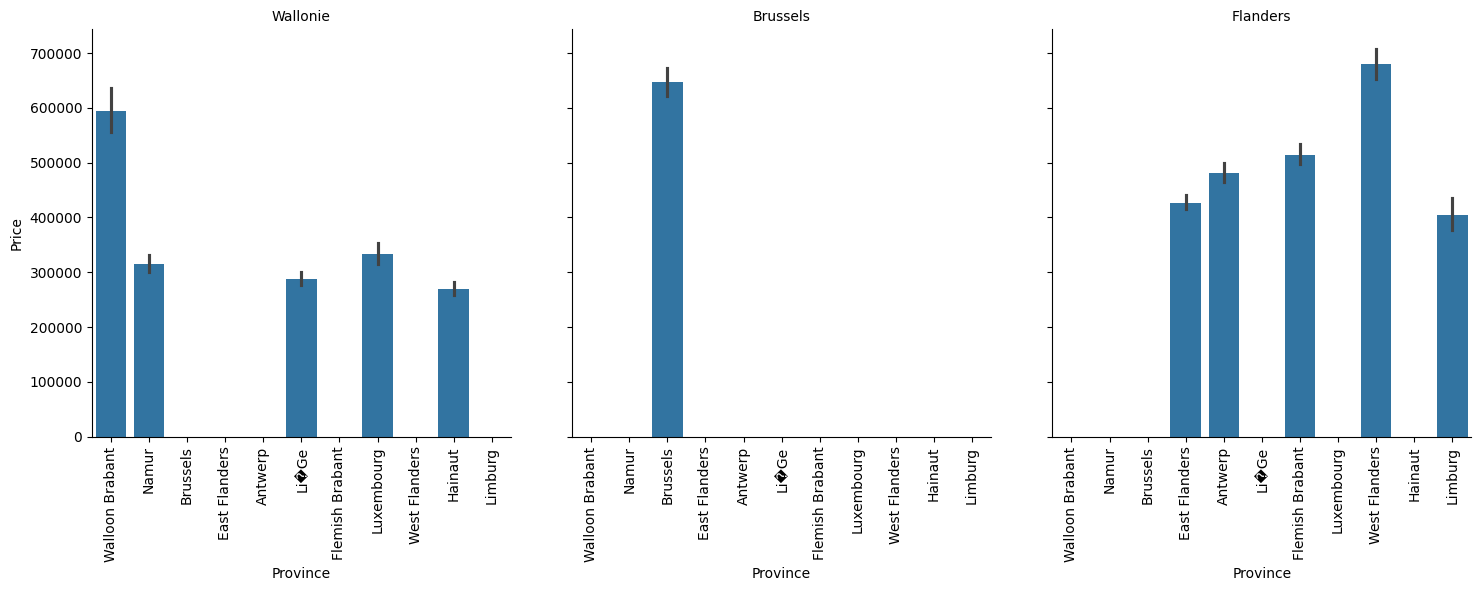

In [ ]:
v = sns.FacetGrid(data, col="Region", col_wrap=3, height=5)
v.map(sns.barplot, "Province", "Price", order=data['Province'].unique())
v.set_xticklabels(rotation=90)
v.set_titles("{col_name}")

plt.show()

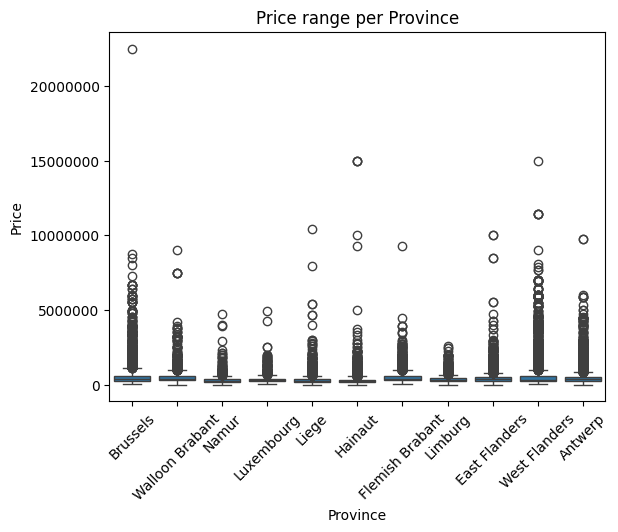

In [ ]:

sns.boxplot(x='Province', y='Price', data=data)

plt.xticks(rotation=45)
plt.title('Price range per Province')
plt.ticklabel_format(style='plain', axis= 'y')
plt.show()

==> Removing to many outliers: need to group by PropertySubType

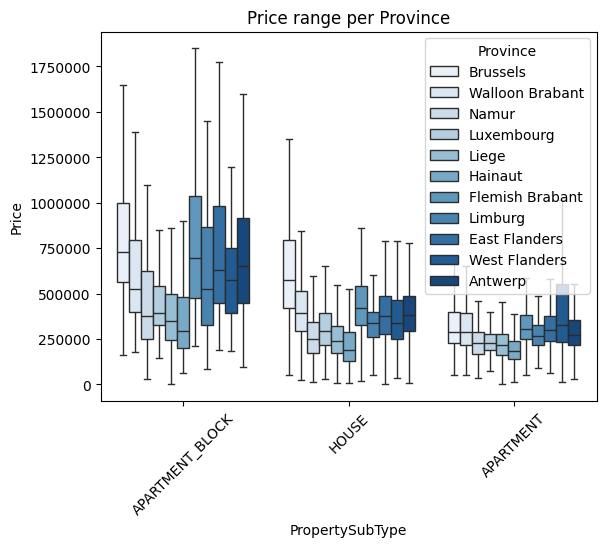

In [ ]:
#sns.boxplot(x='Province', y='Price', data=data, showfliers=False)
#data.groupby['','Privince', 'Price']
#data only for houses and apartment
filtered_data = data[data['PropertySubType'].isin(['HOUSE', 'APARTMENT', 'APARTMENT_BLOCK'])]

sns.boxplot(x='PropertySubType', y='Price', hue='Province', data=filtered_data, showfliers=False, palette="Blues")
plt.xticks(rotation=45)
plt.title('Price range per Province')
plt.ticklabel_format(style='plain', axis= 'y')
plt.show()

3. Price vs EPCScore

4. Price vs LivindArea

<function matplotlib.pyplot.show(close=None, block=None)>

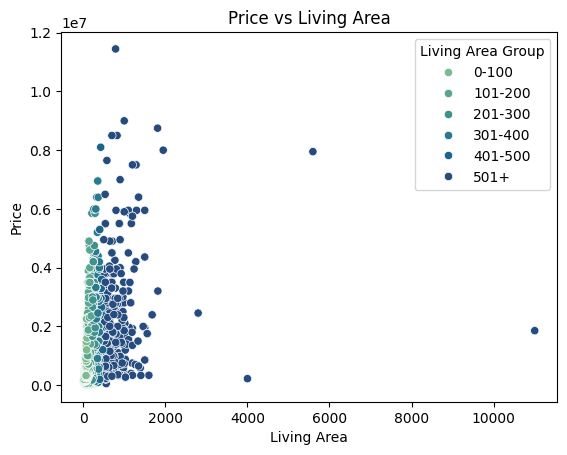

In [ ]:
#defining bins and label for in new column:
bins = [0, 100, 200, 300, 400, 500, float('inf')]
labels = ['0-100', '101-200', '201-300','301-400', '401-500', '501+']
assert len(labels) == len(bins) - 1
#make a new column: categorising Living Area
data["LivingAreaCat"] = pd.cut(data['LivingArea'],bins=bins, labels=labels)
sns.scatterplot(data=data, x="LivingArea", y="Price", hue='LivingAreaCat',palette='crest')

#customize plt
plt.xlabel('Living Area')
plt.ylabel('Price')
plt.title('Price vs Living Area')
plt.legend(title='Living Area Group')
plt.show()

There are outliners:
we want to remove those by:
1. looking for the data LivingArea > 3000
2. delete this data (we don't need it)
3. show plot again with removed data

In [ ]:
data[data['LivingArea']>3000]


,Unnamed: 0,ID,City,PostalCode,Region,District,Province,PropertyType,PropertySubType,Price,...,Garden,GardenArea,Facades,SwimmingPool,Condition,EPCScore,Latitude,Longitude,Property url,LivingAreaCat
5259,5264,10606416,Faimes,4317,Wallonie,Waremme,Li�Ge,House,Castle,1850000,...,0,50000,4,0,Good,E,50,5,Https://Www.Immoweb.Be/En/Classified/Castle/Fo...,501+
7100,7108,11026468,Bl�Gny,4670,Wallonie,Li�Ge,Li�Ge,House,House,215000,...,1,400,3,0,To_Restore,F,50,5,Https://Www.Immoweb.Be/En/Classified/House/For...,501+
9664,9695,11066133,Li�Ge,4000,Wallonie,Li�Ge,Li�Ge,House,Exceptional_Property,7950000,...,0,0,2,0,To_Renovate,Nan,50,5,Https://Www.Immoweb.Be/En/Classified/Exception...,501+


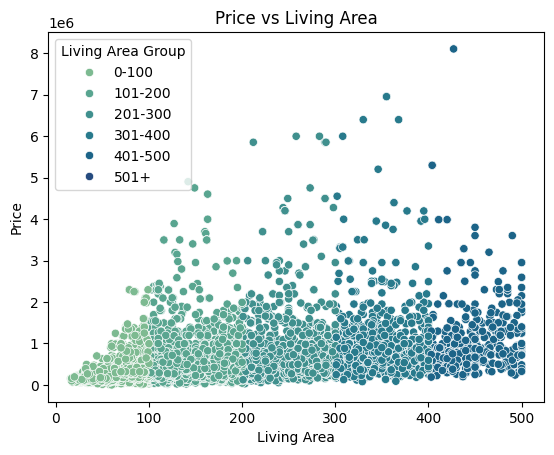

In [ ]:
#defining bins and label for in new column:
bins = [0, 100, 200, 300, 400, 500, float('inf')]
labels = ['0-100', '101-200', '201-300','301-400', '401-500', '501+']
assert len(labels) == len(bins) - 1

#cutting outliners:
df = data[data['LivingArea'] <= 500]

#make a new column: categorising Living Area
data["LivingAreaCat"] = pd.cut(df['LivingArea'],bins=bins, labels=labels)
sns.scatterplot(data=data, x="LivingArea", y="Price", hue='LivingAreaCat',palette='crest')

#customize plt
plt.xlabel('Living Area')
plt.ylabel('Price')
plt.title('Price vs Living Area')
plt.legend(title='Living Area Group')
plt.show()

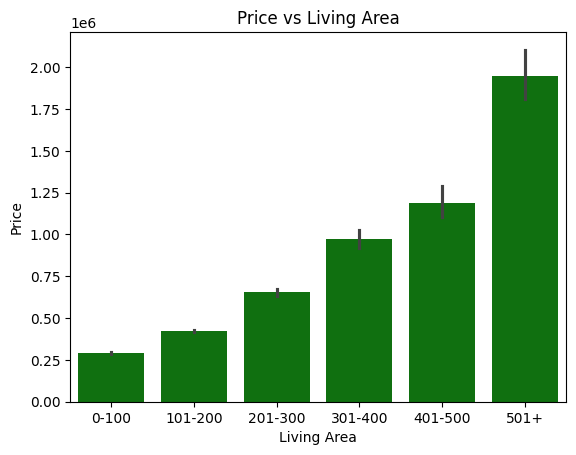

In [ ]:
#defining bins and label for in new column:
bins = [0, 100, 200, 300, 400, 500, float('inf')]
labels = ['0-100', '101-200', '201-300','301-400', '401-500', '501+']
assert len(labels) == len(bins) - 1

#make a new column: categorising Living Area
data["LivingAreaCat"] = pd.cut(data['LivingArea'],bins=bins, labels=labels)
sns.barplot(data=data, x="LivingAreaCat", y="Price", color="green")

#customize plt
plt.xlabel('Living Area')
plt.ylabel('Price')
plt.title('Price vs Living Area')
plt.show()

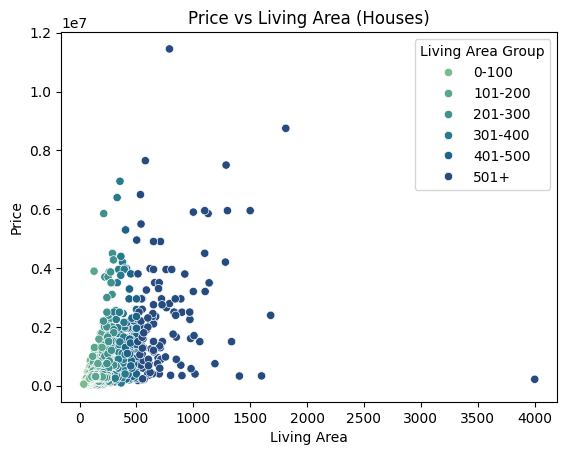

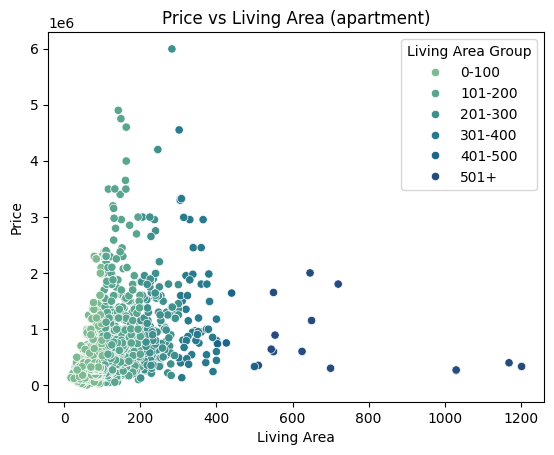

In [ ]:
#defining bins and label for in new column:
bins = [0, 100, 200, 300, 400, 500, float('inf')]
labels = ['0-100', '101-200', '201-300','301-400', '401-500', '501+']
assert len(labels) == len(bins) - 1
#cutting outliners:
#df = data[data['LivingArea'] <= 500]
#make a new column: categorising Living Area
data["LivingAreaCat"] = pd.cut(data['LivingArea'],bins=bins, labels=labels)

#visuals for houses
houses_data = data[data['PropertySubType'] == 'House']
sns.scatterplot(data=houses_data, x="LivingArea", y="Price", hue='LivingAreaCat',palette='crest')

plt.xlabel('Living Area')
plt.ylabel('Price')
plt.title('Price vs Living Area (Houses)')
plt.legend(title='Living Area Group')
plt.show()


#visuals for apartments
app_data = data[data['PropertySubType'] == 'Apartment']
sns.scatterplot(data=app_data, x="LivingArea", y="Price", hue='LivingAreaCat',palette='crest')

#customize plt
plt.xlabel('Living Area')
plt.ylabel('Price')
plt.title('Price vs Living Area (apartment)')
plt.legend(title='Living Area Group')
plt.show()

5. Relation between KitchenType and Price?

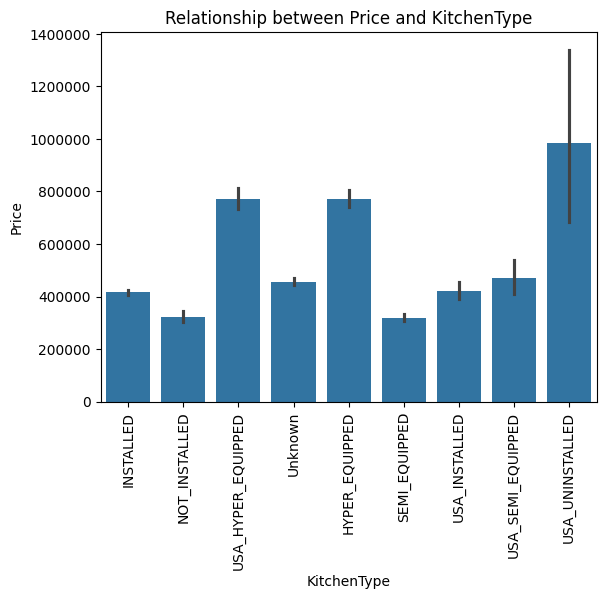

In [ ]:
data['KitchenType'] = data['KitchenType'].fillna('Unknown')
sns.barplot(data=data, x="KitchenType",y="Price")
#sns.lineplot(data=data, x="KitchenType", y="Price")
plt.ticklabel_format(style='plain', axis= 'y')
plt.title('Relationship between Price and KitchenType')
plt.xticks(rotation=90)
plt.show()

Conclusion: there is some kind of relation between price and installed kitchen.
I want to see some further differences:
1. with the propertySubTypes (houses, apartment, loft, ex.)

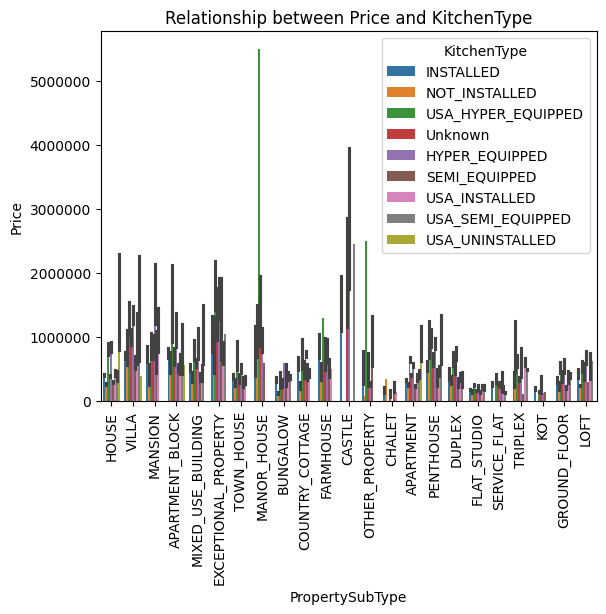

In [ ]:
data['KitchenType'] = data['KitchenType'].fillna('Unknown')
sns.barplot(data=data, x="PropertySubType",y="Price", hue='KitchenType')
#sns.lineplot(data=data, x="KitchenType", y="Price")
plt.ticklabel_format(style='plain', axis= 'y')
plt.title('Relationship between Price and KitchenType with PropertySubType')
plt.xticks(rotation=90)
plt.show()

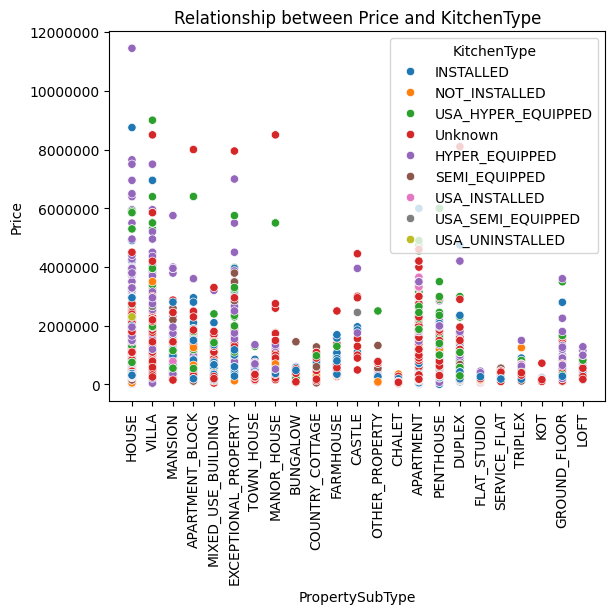

In [ ]:
data['KitchenType'] = data['KitchenType'].fillna('Unknown')
sns.scatterplot(data=data, x="PropertySubType",y="Price", hue='KitchenType')
#sns.lineplot(data=data, x="KitchenType", y="Price")
plt.ticklabel_format(style='plain', axis= 'y')
plt.title('Relationship between Price and KitchenType')
plt.xticks(rotation=90)
plt.show()

6. Mapping out the data

In [ ]:
# Load data
raw_data = pd.read_csv('../src/raw/raw_data.csv')
data = pd.DataFrame(raw_data)

# Calculate Price per Living Area
data['PricePerLivingArea'] = data['Price'] / data['LivingArea']

# Create a scatter plot using Plotly Express with open-street-map style
fig = px.scatter_mapbox(data, lat='Latitude', lon='Longitude', color='PricePerLivingArea',
                        color_continuous_scale='Plasma', size_max=6, zoom=7,
                        center=dict(lat=data['Latitude'].mean(), lon=data['Longitude'].mean()),
                        hover_name='PricePerLivingArea', title='Price per Living Area',
                        range_color=[data['PricePerLivingArea'].quantile(0.25),
                                     data['PricePerLivingArea'].quantile(0.75)],
                        mapbox_style='open-street-map',
                        hover_data={'City': True, 'Price': True, 'LivingArea': True})

# Update color bar title
fig.update_coloraxes(colorbar_title='Price per Living Area')

# Show the plot
fig.show()

7. which numerical data is correlated to each other?

In [ ]:
raw_data = pd.read_csv('../src/raw_data.csv')
data = pd.DataFrame(raw_data)
#only including numerical data from our DataFrame data
data.select_dtypes(include=['int64', 'float64'])

,ID,Floor,PostalCode,Price,BidStylePricing,ConstructionYear,BedroomCount,LivingArea,Furnished,Fireplace,...,Garden,GardenArea,Facades,SwimmingPool,EnergyConsumptionPerSqm,Latitude,Longitude,bookmarkCount,ViewCount,PropertyUrl
0,11144966,NaN,1060,550000.0,NaN,NaN,11,296.0,0.0,0,...,NaN,0.0,2.0,NaN,368.0,NaN,NaN,20.0,1059.0,NaN
1,10356246,NaN,1030,545000.0,0.0,NaN,5,225.0,0.0,0,...,NaN,70.0,2.0,NaN,NaN,NaN,NaN,37.0,4122.0,NaN
2,10804330,NaN,1030,539000.0,NaN,NaN,5,224.0,0.0,0,...,NaN,0.0,2.0,NaN,407.0,NaN,NaN,63.0,3417.0,NaN
3,10848449,NaN,1200,460000.0,NaN,NaN,3,150.0,0.0,0,...,NaN,0.0,2.0,NaN,346.0,NaN,NaN,90.0,5115.0,NaN
4,11123555,NaN,1150,1225000.0,NaN,NaN,7,300.0,NaN,0,...,NaN,0.0,NaN,NaN,NaN,50.837579,4.416106,9.0,595.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73508,11070262,6.0,2800,210000.0,0.0,1978.0,2,81.0,NaN,1,...,NaN,NaN,2.0,NaN,169.0,51.038291,4.472624,7.0,473.0,NaN
73509,11079075,0.0,2600,495000.0,0.0,NaN,1,100.0,NaN,0,...,1.0,NaN,2.0,0.0,43.0,51.195532,4.413364,27.0,1562.0,NaN
73510,10917926,2.0,2840,428000.0,0.0,NaN,3,210.0,0.0,0,...,NaN,NaN,2.0,0.0,163.0,51.104525,4.412307,23.0,4162.0,NaN
73511,11056745,0.0,2060,240000.0,0.0,1918.0,1,71.0,NaN,0,...,NaN,NaN,NaN,0.0,315.0,51.224284,4.438344,29.0,1820.0,NaN


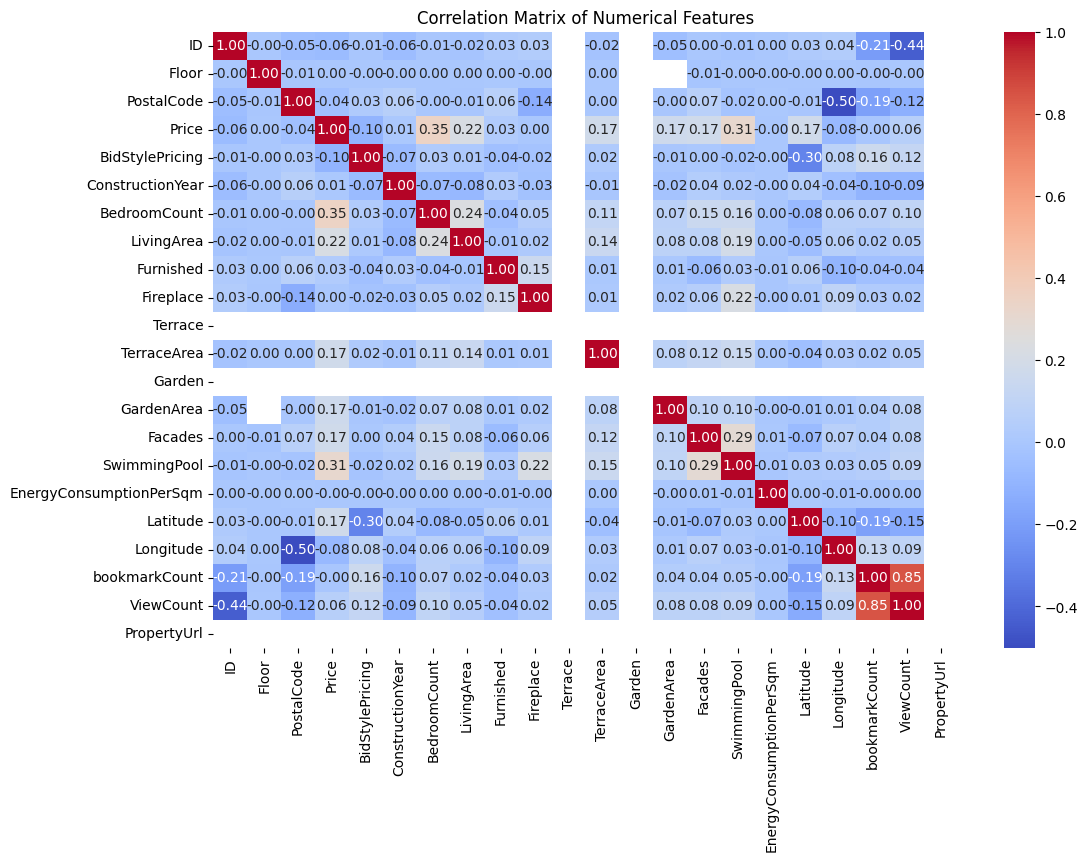

In [ ]:
raw_data = pd.read_csv('../src/raw_data.csv')
data = pd.DataFrame(raw_data)
#filtering numerical data
numerical_features = data.select_dtypes(include=['int64', 'float64'])

# Calculate correlation matrix
correlation_matrix = numerical_features.corr()

# Visualize correlation matrix using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

==> Not ideal because takes everything in (include=['int64', 'float64']) and so the binair data is included to!
so need to select only the columns I want with a list:

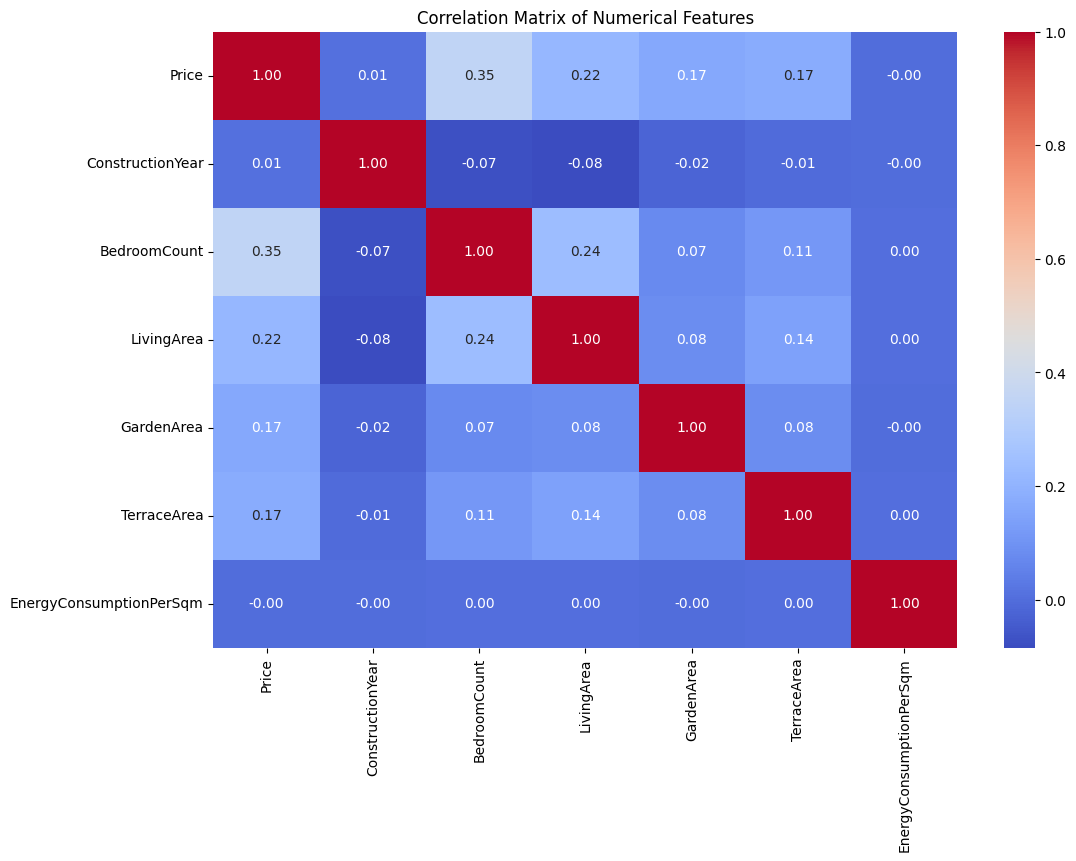

In [78]:
raw_data = pd.read_csv('../src/raw_data.csv')
data = pd.DataFrame(raw_data)
#filtering numerical data
numerical_features = ['Price', 'ConstructionYear','BedroomCount', 'LivingArea','GardenArea', 'TerraceArea', 'EnergyConsumptionPerSqm']
# Calculate correlation matrix
correlation_matrix = data[numerical_features].corr()

# Visualize correlation matrix using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

=> we expect a negative correlation between EnergyConsumptionPerSqm and the Prices of the immo. It doesn't show up like this, so we need to search why it doesn't show up. Probably because of the missing data.

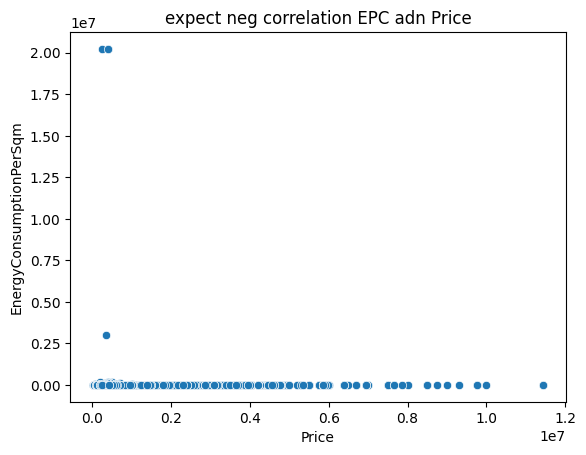

In [27]:
#remove the missing data for EPC value
data['EnergyConsumptionPerSqm'].dropna()


# trying to show the negative correlation
sns.scatterplot(data=data, x='Price', y='EnergyConsumptionPerSqm')
plt.title('expect neg correlation EPC adn Price')
plt.show()

In [41]:
#remove the missing data for EPC value
data['EnergyConsumptionPerSqm'].dropna()

#detection otliers
def_outliers = data.where((data['EnergyConsumptionPerSqm'] > 250000)) #& (data['bp'] < 0.8))
no_outliers = data.drop(def_outliers[0])

# trying to show the negative correlation
sns.scatterplot(data=no_outliers, x='Price', y='EnergyConsumptionPerSqm')

plt.show()

KeyError: 0

Linear price per year

<Figure size 1000x600 with 0 Axes>

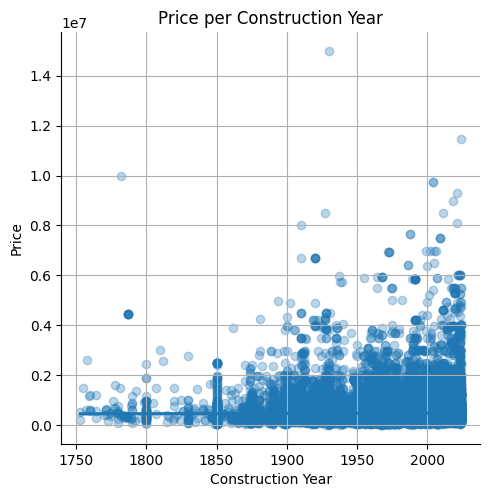

In [89]:

plt.figure(figsize=(10, 6))
wanted_year =data[data['ConstructionYear'] < 2025]
sns.lmplot(x='ConstructionYear', y='Price', data=wanted_year, scatter_kws={'alpha':0.3})
plt.title('Price per Construction Year')
plt.xlabel('Construction Year')
plt.ylabel('Price')
plt.grid(True)
plt.show()


Linaer price per EnergyConsumptionPerSqm

<Figure size 1000x600 with 0 Axes>

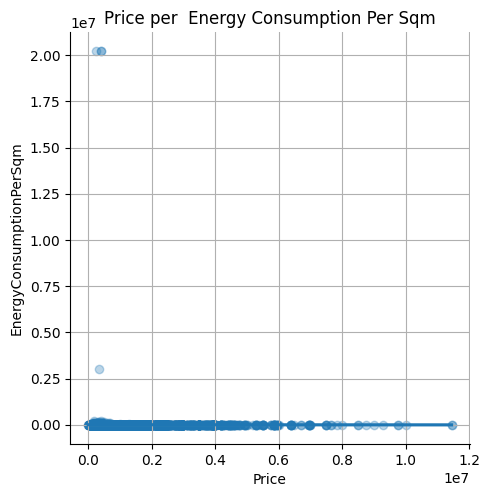

In [28]:

plt.figure(figsize=(10, 6))
select_data = data[data['EnergyConsumptionPerSqm'] < 500]

sns.lmplot(x='Price', y='EnergyConsumptionPerSqm', data=data, scatter_kws={'alpha':0.3})
plt.title('Price per  Energy Consumption Per Sqm')
plt.xlabel('Price')
plt.ylabel('EnergyConsumptionPerSqm')
plt.grid(True)
plt.show()

not quite there yet, I want to make it more visual

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the ranges for each category
ranges = {'A+': (float('-inf'), 0),
          'B': (100, 200),
          'C': (200, 300),
          'D': (300, 400),
          'E': (400, 500)}

# Create a new column based on these ranges
data['EnergyConsumptionCategory'] = pd.cut(data['EnergyConsumptionPerSqm'], bins=[ranges[category] for category in ranges.keys()], labels=ranges.keys(), include_lowest=True)

# Plot for each 'PropertySubType'
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data['EnergyConsumptionCategory'], x='EnergyConsumptionPerSqm', y='Price')
plt.title(f'Scatter Plot of Energy Consumption vs. Price for {subtype}')
plt.xlabel('Energy Consumption (kWh per m²/year)')
plt.ylabel('Price')
plt.tight_layout()
plt.show()





##START

1. Clean data

In [31]:
model_data = pd.read_csv('../src/model_data.csv')
data = pd.DataFrame(model_data)

2. Make a carrolation

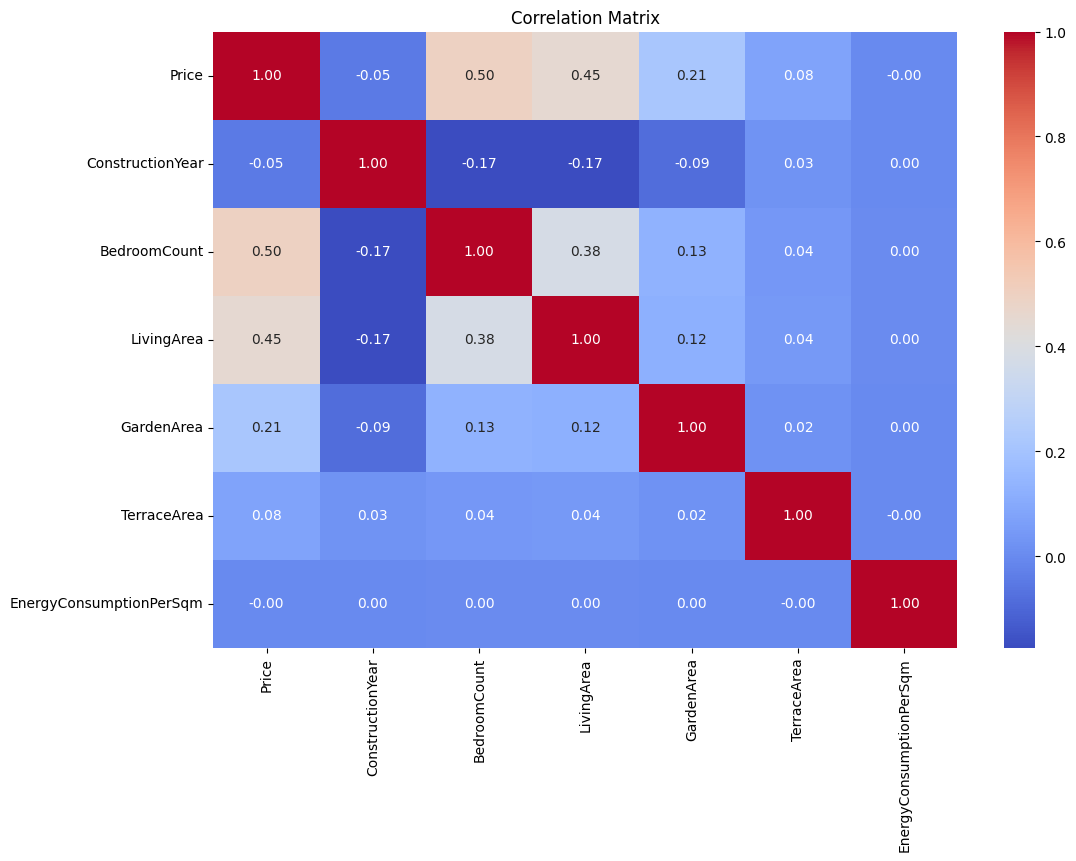

In [32]:
#filtering numerical data
numerical_features = ['Price', 'ConstructionYear','BedroomCount', 'LivingArea','GardenArea', 'TerraceArea', 'EnergyConsumptionPerSqm']
# Calculate correlation matrix
correlation_matrix = data[numerical_features].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

3. Most relevant correlation is: LivingArea per Price and BedroomCount per Price

correlation: LivingArea per Price

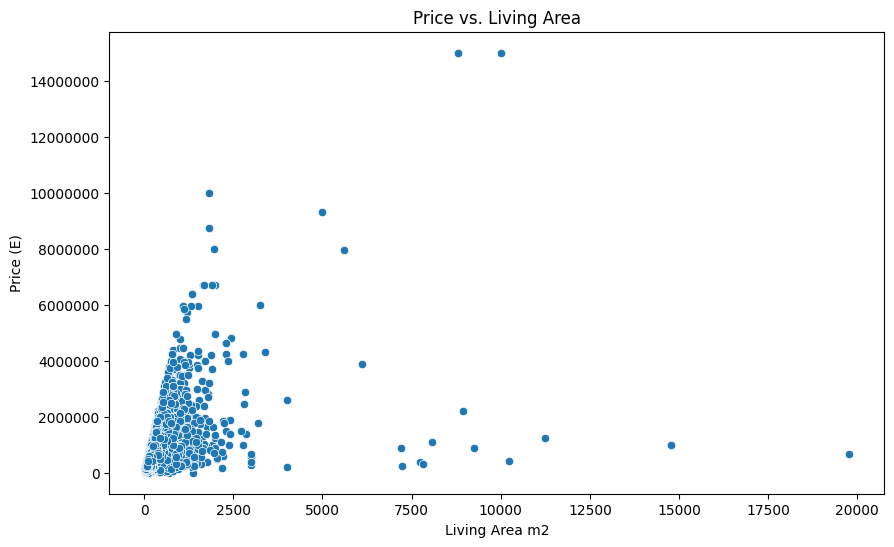

In [33]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x="LivingArea", y="Price", data=data)
plt.title("Price vs. Living Area")
plt.ticklabel_format(style='plain', axis= 'y')
plt.xlabel("Living Area m2")
plt.ylabel("Price (E)")
plt.show()

per propertySubType:

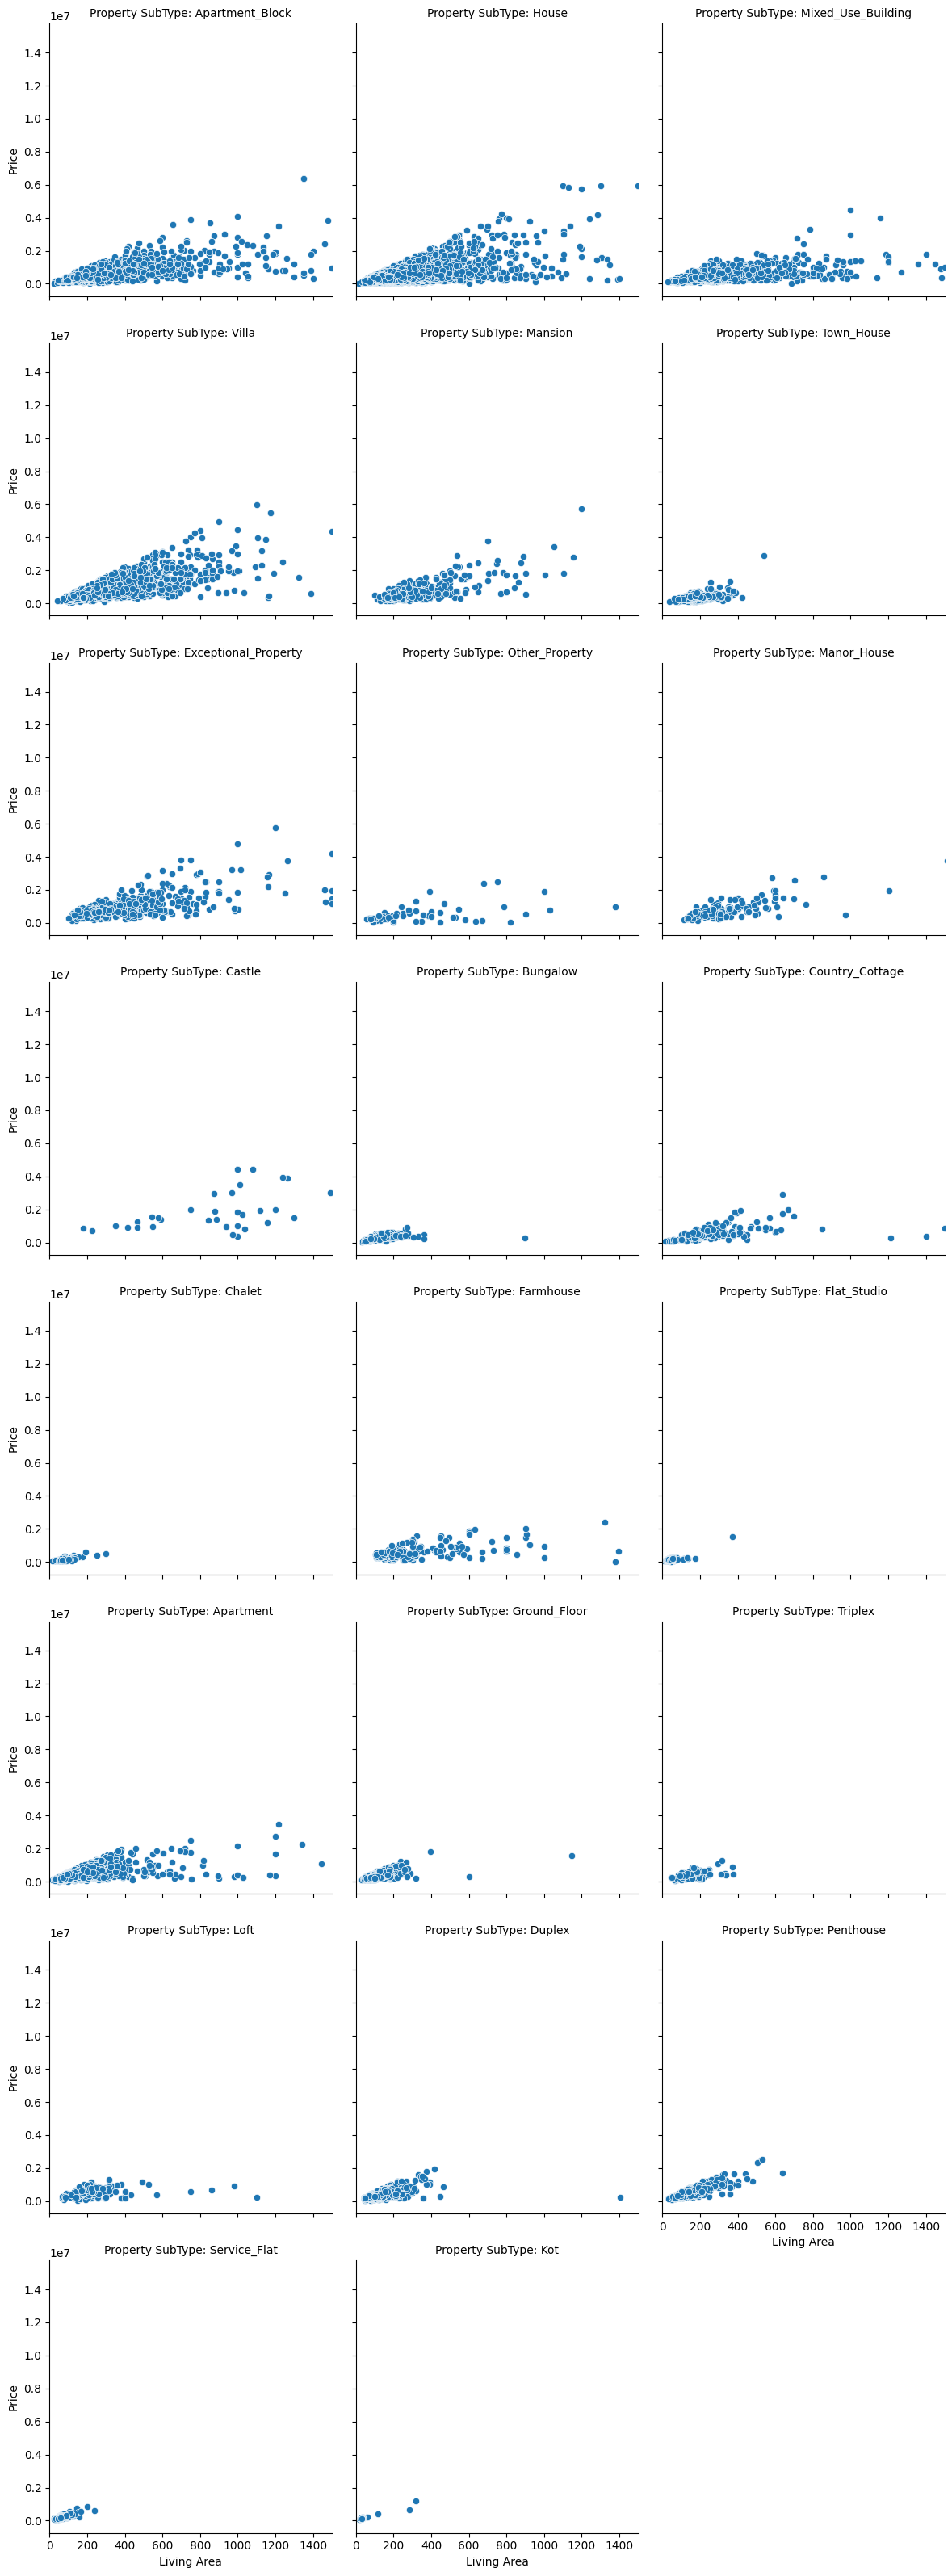

In [34]:
g = sns.FacetGrid(data, col="PropertySubType", col_wrap=3, height=4)
g.map(sns.scatterplot, "LivingArea", "Price")
g.set_titles("Property SubType: {col_name}")
g.set_xlabels("Living Area")
g.set_ylabels("Price")

#limitation on scale X-axis:
g.set(xlim=(0,1500))

plt.show()

==> conclusion: lineair correlation between LivingArea and Price per PropertySubType

Correlation: BedroomCount per Price

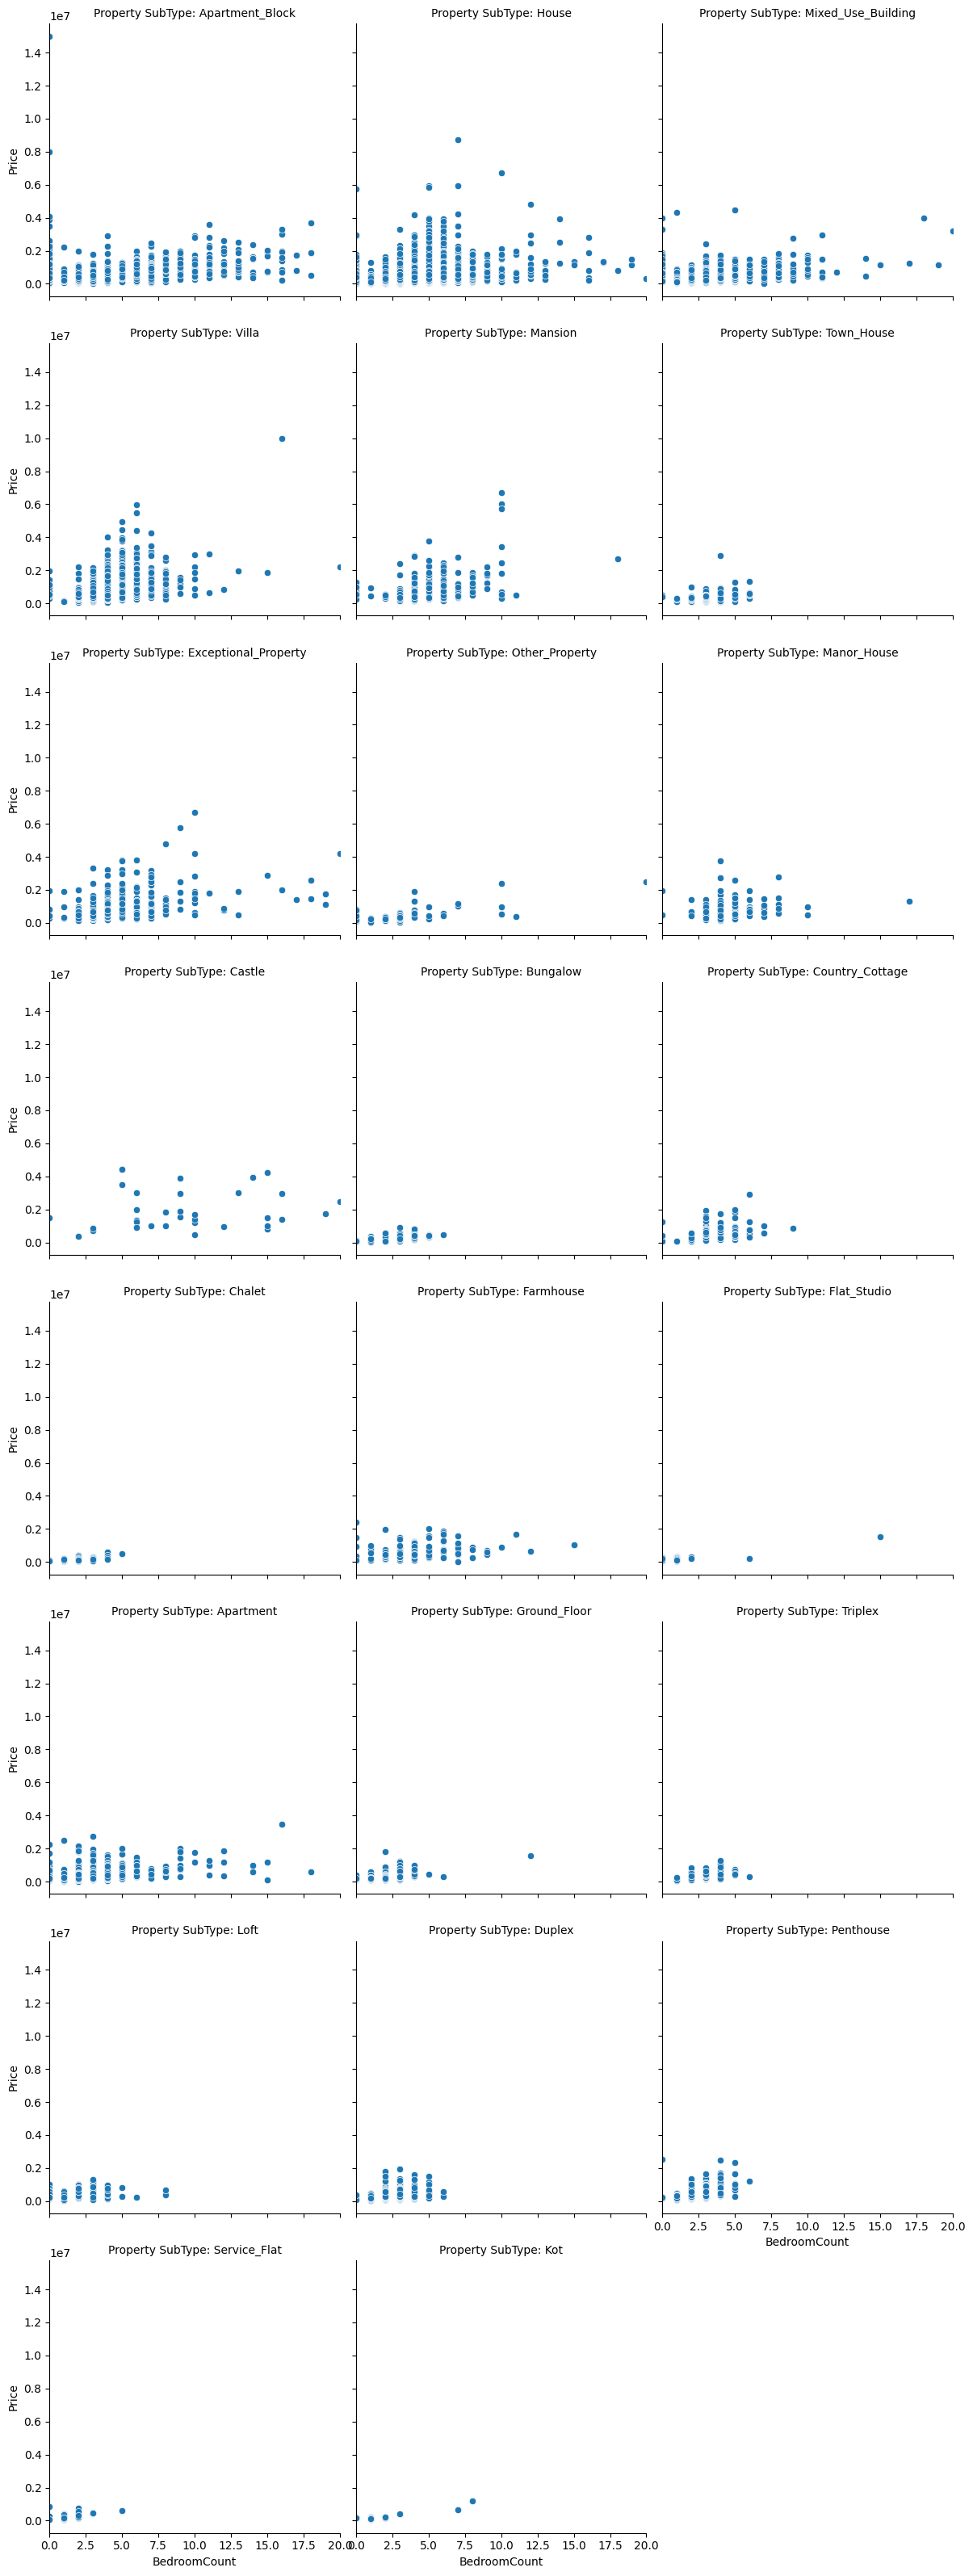

In [35]:
g = sns.FacetGrid(data, col="PropertySubType", col_wrap=3, height=4)
g.map(sns.scatterplot, "BedroomCount", "Price")
g.set_titles("Property SubType: {col_name}")
g.set_xlabels("BedroomCount")
g.set_ylabels("Price")

#limitation on scale X-axis:
g.set(xlim=(0,20))

plt.show()

Correlation bedroomcount - Livingarea - Price splitting into houses and apartment

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('../src/cleaned_data.csv')
cleaned_data = pd.DataFrame(data)
data.info()

##HOUSES

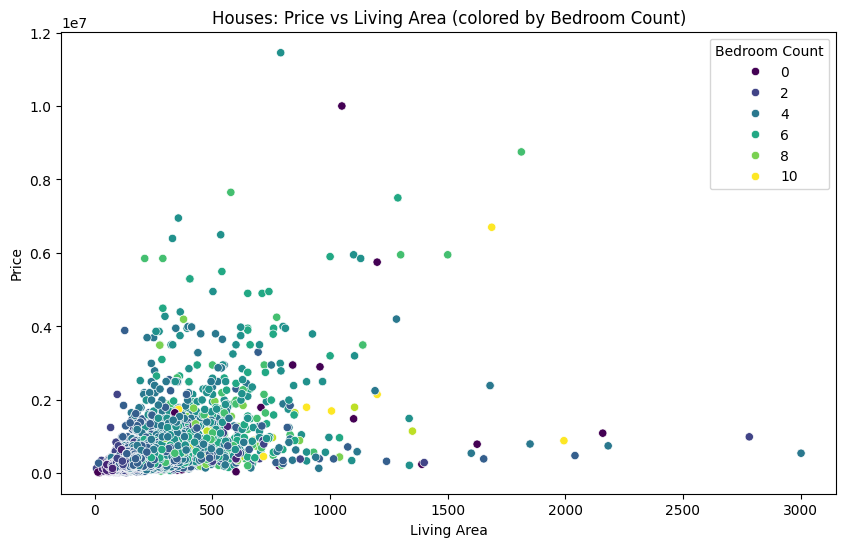

In [39]:
#import data as Dataframe:
model_data = pd.read_csv('../src/cleaned_data.csv')
data = pd.DataFrame(model_data)

#Filtering the data between houses and apartment (to check for differences)
houses_data = data[data['PropertySubType'] == 'House']
house_data_filtered = houses_data[(houses_data['LivingArea'] <= 4000) & (houses_data['BedroomCount'] <= 10)]

#house from subtype
house_data = data[data['PropertySubType'] == 'House']
plt.figure(figsize=(10, 6))
sns.scatterplot(data=house_data_filtered, x='LivingArea', y='Price', hue='BedroomCount', palette='viridis')
plt.xlabel('Living Area')
plt.ylabel('Price')
plt.title('Houses: Price vs Living Area (colored by Bedroom Count)')
plt.legend(title='Bedroom Count', loc='upper right')
plt.show()

Removing outliers for houses

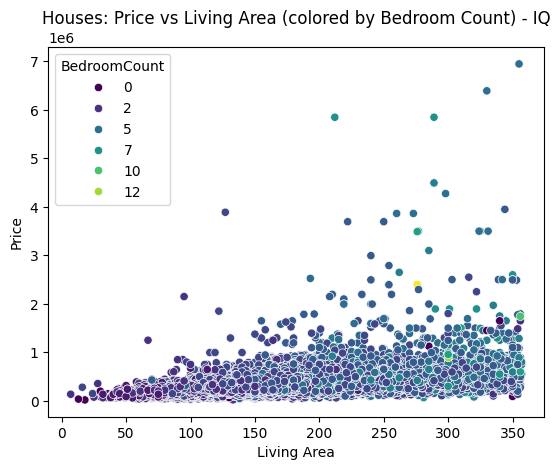

In [41]:
#plotmodel with IQ def
def remove_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
model_data = remove_outliers(cleaned_data, 'LivingArea')
data_houses = model_data[model_data['PropertySubType'] == 'House']

sns.scatterplot(data=data_houses, x='LivingArea', y='Price', hue='BedroomCount', palette='viridis')
plt.xlabel('Living Area')
plt.ylabel('Price')
plt.title('Houses: Price vs Living Area (colored by Bedroom Count) - IQ')


#show plot
plt.show()

##APARTMENTS

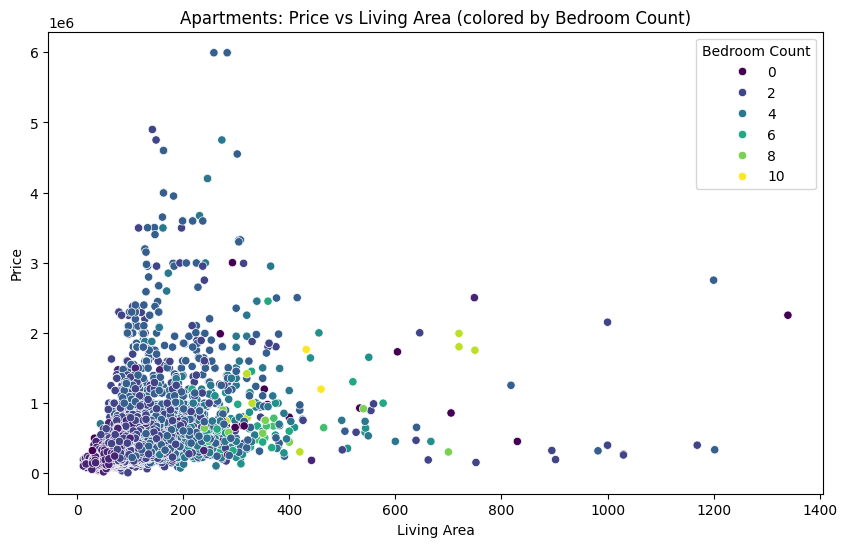

In [40]:
apartments_data = data[data['PropertySubType'] == 'Apartment']
apartments_data_filtered = apartments_data[(apartments_data['LivingArea'] <= 2000) & (apartments_data['BedroomCount'] <= 10)]

plt.figure(figsize=(10, 6))
sns.scatterplot(data=apartments_data_filtered, x='LivingArea', y='Price', hue='BedroomCount', palette='viridis')
plt.xlabel('Living Area')
plt.ylabel('Price')
plt.title('Apartments: Price vs Living Area (colored by Bedroom Count)')
plt.legend(title='Bedroom Count', loc='upper right')
plt.show()

Remove outliers from apartments

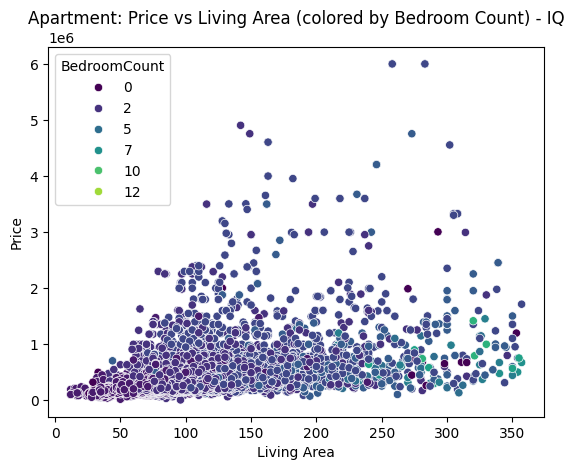

In [43]:
#plotmodel with IQ def
def remove_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
model_data = remove_outliers(cleaned_data, 'LivingArea')
data_apartments = model_data[model_data['PropertySubType'] == 'Apartment']

sns.scatterplot(data=data_apartments, x='LivingArea', y='Price', hue='BedroomCount', palette='viridis')
plt.xlabel('Living Area')
plt.ylabel('Price')
plt.title('Apartment: Price vs Living Area (colored by Bedroom Count) - IQ')


#show plot
plt.show()

OVERVIEW HOUSES AND APARTMENT:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


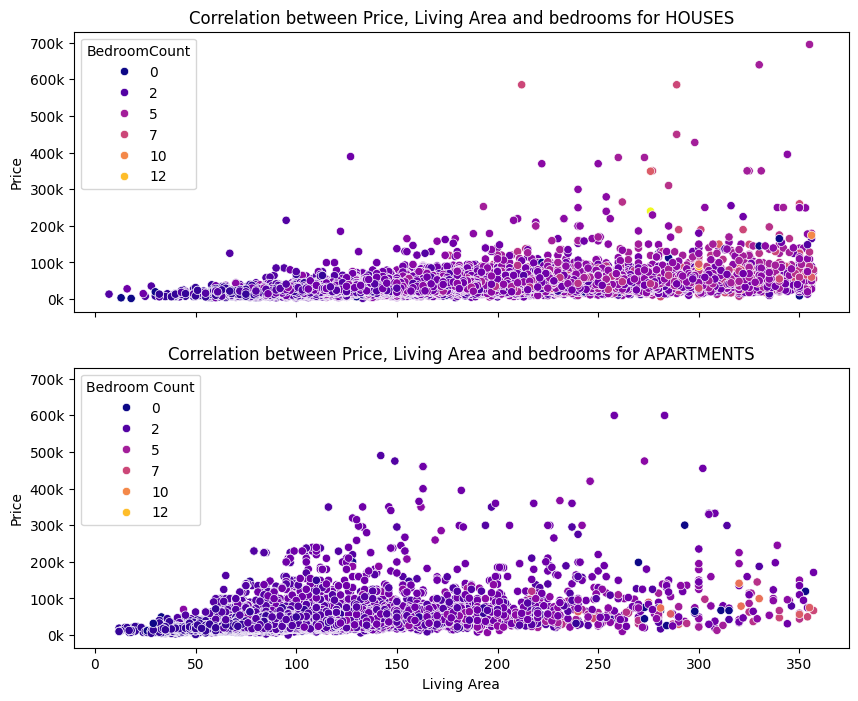

In [42]:
#plotmodel with IQ def
def remove_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
model_data = remove_outliers(cleaned_data, 'LivingArea')

# Define a function to format the price from 2e6 to 200k in plot
def price_formatter(x, pos):
    return f'{x/10000:.0f}k'

#using plot:
fig, axes = plt.subplots(2, 1, figsize=(10, 8), sharex=True, sharey=True)
plt.gca().yaxis.set_major_formatter(price_formatter)   #aply price fromat

#plotinfo for houses
data_houses = model_data[model_data['PropertySubType'] == 'House']
sns.scatterplot(data=data_houses, x='LivingArea', y='Price', hue='BedroomCount', palette='plasma', ax=axes[0])
axes[0].set_title('Correlation between Price, Living Area and bedrooms for HOUSES')
axes[0].set_xlabel('Living Area')
axes[0].set_ylabel('Price')
plt.legend(title='Bedroom Count', loc='upper left')


#plotinfo for apartments:
data_apartments = model_data[model_data['PropertySubType'] == 'Apartment']

sns.scatterplot(data=data_apartments, x='LivingArea', y='Price', hue='BedroomCount', palette='plasma', ax=axes[1])
axes[1].set_title('Correlation between Price, Living Area and bedrooms for APARTMENTS')
axes[1].set_xlabel('Living Area')
axes[1].set_ylabel('Price')
plt.legend(title='Bedroom Count', loc='upper left')



#show plot
plt.show()